In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

trans_noconst= pd.read_csv("/Users/liqunp/Dropbox (Princeton)/Work/Switch_2020_rapid_Ind_SA5_new/Energy_from_He_Test/outputs/detail_transmission.csv") 
trans_const = pd.read_csv("/Users/liqunp/Dropbox (Princeton)/Work/Switch_2020_rapid_RE_SA5_new/Energy_from_He_Test/outputs/detail_transmission.csv") 
trans_demand = pd.read_csv("/Users/liqunp/Dropbox (Princeton)/Work/Switch_2020_rapid_Demand_SA5_new/Energy_from_He_Test/outputs/detail_transmission.csv") 

trans_noconst.timepoints= pd.to_datetime(trans_noconst.timepoints, format='%Y.%m.%d.%H')
trans_demand.timepoints= pd.to_datetime(trans_demand.timepoints, format='%Y.%m.%d.%H')
trans_const.timepoints= pd.to_datetime(trans_const.timepoints, format='%Y.%m.%d.%H')

trans_const["year"] = trans_const["timepoints"].dt.year
trans_noconst["year"] = trans_noconst["timepoints"].dt.year
trans_demand["year"] = trans_demand["timepoints"].dt.year


annual_trans_noconst = trans_noconst.groupby([
    pd.Grouper('year')
]).sum()
annual_trans_const = trans_const.groupby([
    pd.Grouper('year')
]).sum()
annual_trans_demand = trans_demand.groupby([
    pd.Grouper('year')
]).sum()


,TxPowerSent,TxPowerReceived
year,,
2025,7.386366e+07,7.166556e+07
2030,8.751313e+07,8.498758e+07
2035,9.882844e+07,9.604946e+07
2040,1.088603e+08,1.057697e+08
2045,1.088279e+08,1.057000e+08
2050,1.170424e+08,1.136238e+08


In [49]:
select_trans_noconst = trans_noconst.groupby([
    pd.Grouper('timepoints')
]).sum()

select_trans_noconst = select_trans_noconst ['TxPowerReceived']/1000  ##unit:Gw
select_trans_demand = trans_demand.groupby([
    pd.Grouper('timepoints')
]).sum()
select_trans_demand = select_trans_demand ['TxPowerReceived']/1000  ##unit:Gw



select_trans_const = trans_const.groupby([
    pd.Grouper('timepoints')
]).sum()



select_trans_const = select_trans_const ['TxPowerReceived']/1000  ##unit:Gw


# select_trans_const.to_csv(r'/Users/liqunp/Desktop/transmission_data.csv')

timepoints
2025-01-22 00:00:00     660.448631
2025-01-22 04:00:00     695.869396
2025-01-22 08:00:00     741.436078
2025-01-22 12:00:00     887.495176
2025-01-22 16:00:00     852.205038
                          ...     
2050-12-12 04:00:00    1108.823980
2050-12-12 08:00:00    1177.251606
2050-12-12 12:00:00    1539.977540
2050-12-12 16:00:00    1762.390203
2050-12-12 20:00:00    1307.813961
Name: TxPowerReceived, Length: 432, dtype: float64

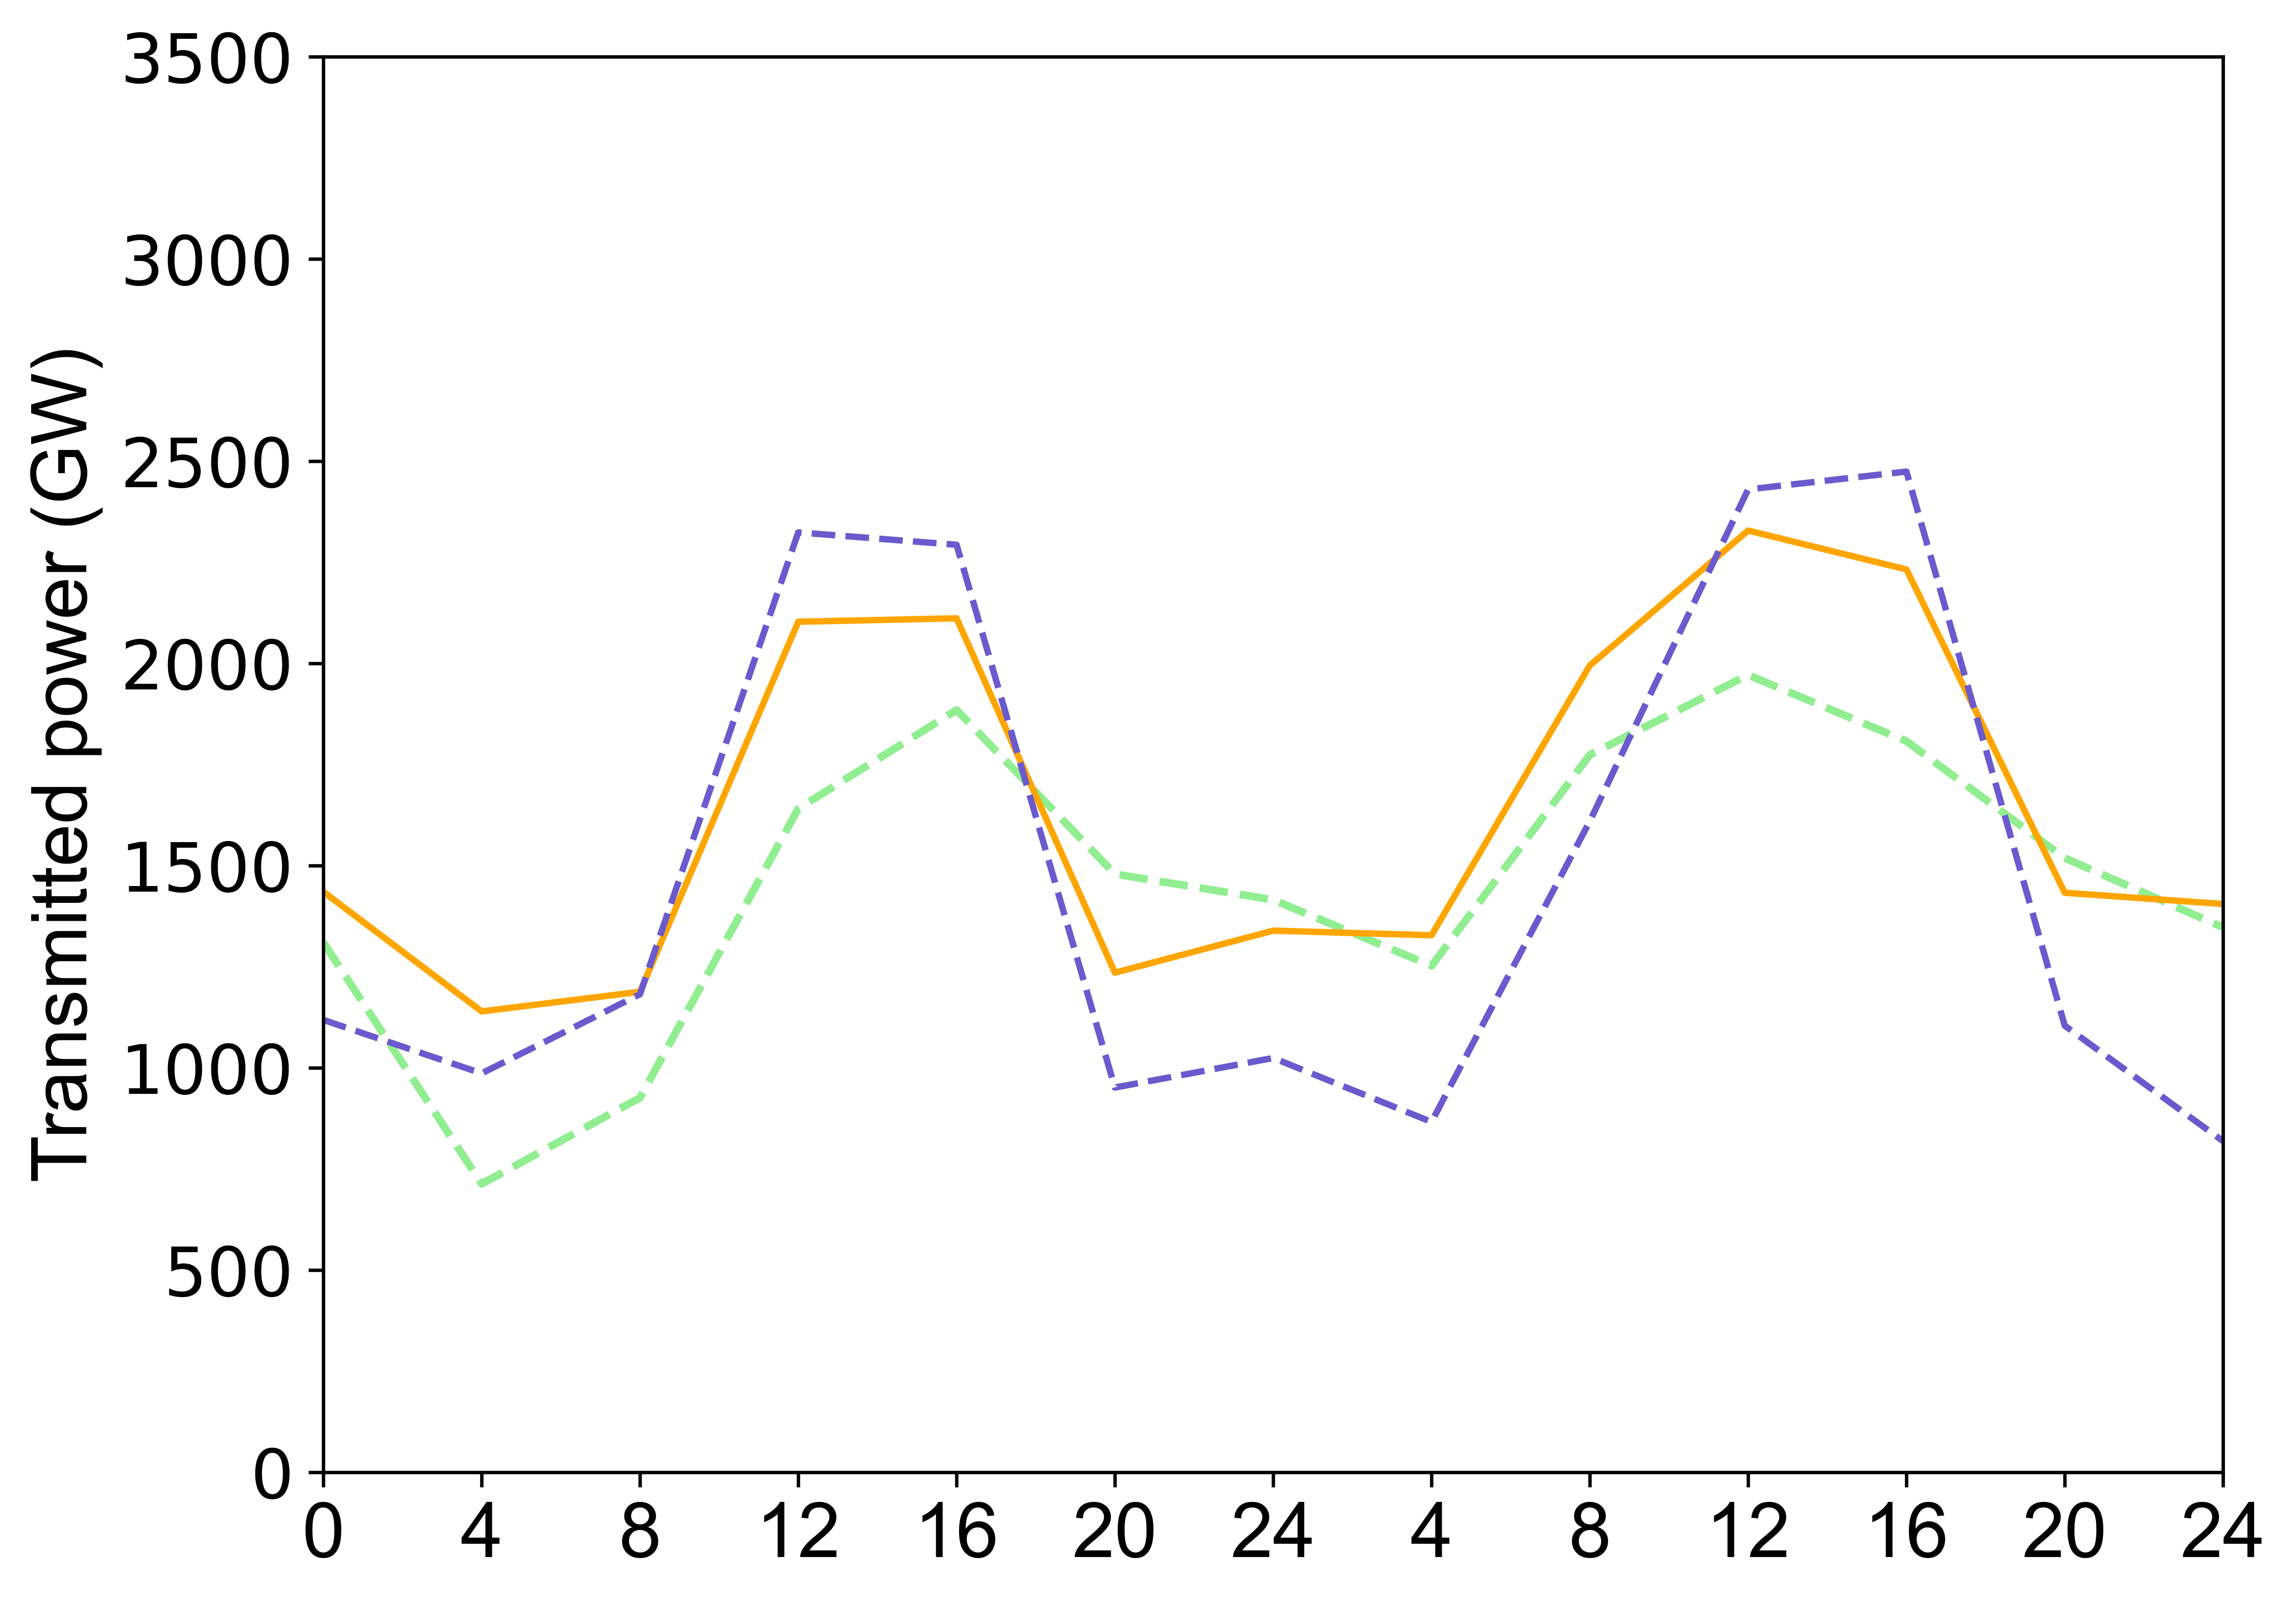

In [50]:
fig = plt.figure(figsize=(8, 6), dpi=600)
r = [0,1,2,3,4,5,6,7,8,9,10,11,12]
Time = ['0','4','8','12', '16', '20','24','4','8','12','16','20','24']
x= range (13) # 432 total
y1 = select_trans_noconst[366:379]
y2 = select_trans_const[366:379]
y3 = select_trans_demand[366:379]

## Plot transmitted power 
plt.plot (x,y2, label = 'RE-connected batteries',linestyle = '--', color='lightgreen',linewidth=1.8)
plt.plot (x,y1, label = 'Grid-connected batteries', color='orange',linewidth=1.5)
plt.xticks(r, Time,fontname = 'Arial', size =18)
plt.xlim(0, 12)
plt.ylim(0, 3500)
plt.yticks(fontsize=16,color = 'black')
plt.ylabel('Transmitted power (GW)', size = 18, fontname = 'Arial') 
plt.plot (x,y3, label = 'Demand-side batteries', linestyle = '--', color='slateblue',  linewidth=1.5)
plt.axvline(x = 72, color = 'grey',lw=4) 
plt.axvline(x = 144, color = 'grey',lw=4) 
plt.axvline(x = 216, color = 'grey',lw=4)
plt.axvline(x = 288, color = 'grey',lw=4)
plt.axvline(x = 360, color = 'grey',lw=4)
plt.legend(frameon=False, bbox_to_anchor=(1, -0.5), ncol=3, fontsize = 18)
# plt.savefig(f"/Users/liqunp/Desktop/transmission_rapid_SA5.png", bbox_inches='tight')

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

trans_noconst= pd.read_csv("/Users/liqunp/Dropbox (Princeton)/Work/Switch_2020_rapid_Ind_SA5_new/Energy_from_He_Test/outputs/transmission.csv") 
trans_const = pd.read_csv("/Users/liqunp/Dropbox (Princeton)/Work/Switch_2020_rapid_RE_SA5_new/Energy_from_He_Test/outputs/transmission.csv") 
trans_demand = pd.read_csv("/Users/liqunp/Dropbox (Princeton)/Work/Switch_2020_rapid_Demand_SA5_new/Energy_from_He_Test/outputs/transmission.csv") 

select_trans_noconst = trans_noconst.groupby([
    pd.Grouper('PERIOD')
]).sum()

select_trans_const = trans_const.groupby([
    pd.Grouper('PERIOD')
]).sum()

select_trans_demand = trans_demand.groupby([
    pd.Grouper('PERIOD')
]).sum()



,trans_dbid,trans_length_km,trans_efficiency,trans_derating_factor,TxCapacityNameplate,TxCapacityNameplateAvailable,TotalAnnualCost
PERIOD,,,,,,,
2023,17289,131576.72,175.8242,184,1.404064e+06,1.404064e+06,3.082774e+10
2028,17289,131576.72,175.8242,184,1.990536e+06,1.990536e+06,4.180368e+10
2033,17289,131576.72,175.8242,184,2.533256e+06,2.533256e+06,4.961904e+10
2038,17289,131576.72,175.8242,184,2.808757e+06,2.808757e+06,5.459760e+10
2043,17289,131576.72,175.8242,184,3.073592e+06,3.073592e+06,6.000671e+10
2048,17289,131576.72,175.8242,184,3.238345e+06,3.238345e+06,6.352852e+10


In [125]:
years= [2023, 2028, 2033, 2038, 2043, 2048]

filled_trans = pd.DataFrame(index=years)
filled_trans.index.name = 'PERIOD'
filled_trans["Ind"] = 0
filled_trans["RE"] = 0
filled_trans["Demand"] = 0
filled_trans

for year in years:
    filled_trans.loc[year, "Ind"] = select_trans_noconst.loc[year, "TotalAnnualCost"]/1000000
    filled_trans.loc[year, "RE"] = select_trans_const.loc[year, "TotalAnnualCost"]/1000000
    filled_trans.loc[year, "Demand"] = select_trans_demand.loc[year, "TotalAnnualCost"]/1000000
                 

{'RE': PERIOD
 2023    1349.887068
 2028    1765.048172
 2033    2182.058627
 2038    2410.929463
 2043    2658.958900
 2048    2741.333060
 Name: TxCapacityNameplateAvailable, dtype: float64,
 'Ind': PERIOD
 2023    1383.029060
 2028    1869.235146
 2033    2316.812626
 2038    2666.433600
 2043    2992.571243
 2048    3169.085464
 Name: TxCapacityNameplateAvailable, dtype: float64,
 'Demand': PERIOD
 2023    1527.448956
 2028    2016.060937
 2033    2405.410006
 2038    2727.101836
 2043    3018.729660
 2048    3209.837820
 Name: TxCapacityNameplateAvailable, dtype: float64}

In [126]:
scenarios= ['RE','Ind','Demand'] 
filled_trans_capacity = {}
filled_trans_capacity['RE'] = select_trans_const["TxCapacityNameplateAvailable"]/1000
filled_trans_capacity['Ind'] = select_trans_noconst["TxCapacityNameplateAvailable"]/1000
filled_trans_capacity['Demand'] = select_trans_demand["TxCapacityNameplateAvailable"]/1000


PERIOD
2023    1332.059495
2028    1807.105289
2033    2316.113367
2038    2480.335553
2043    2681.651889
2048    2776.123227
Name: TxCapacityNameplateAvailable, dtype: float64

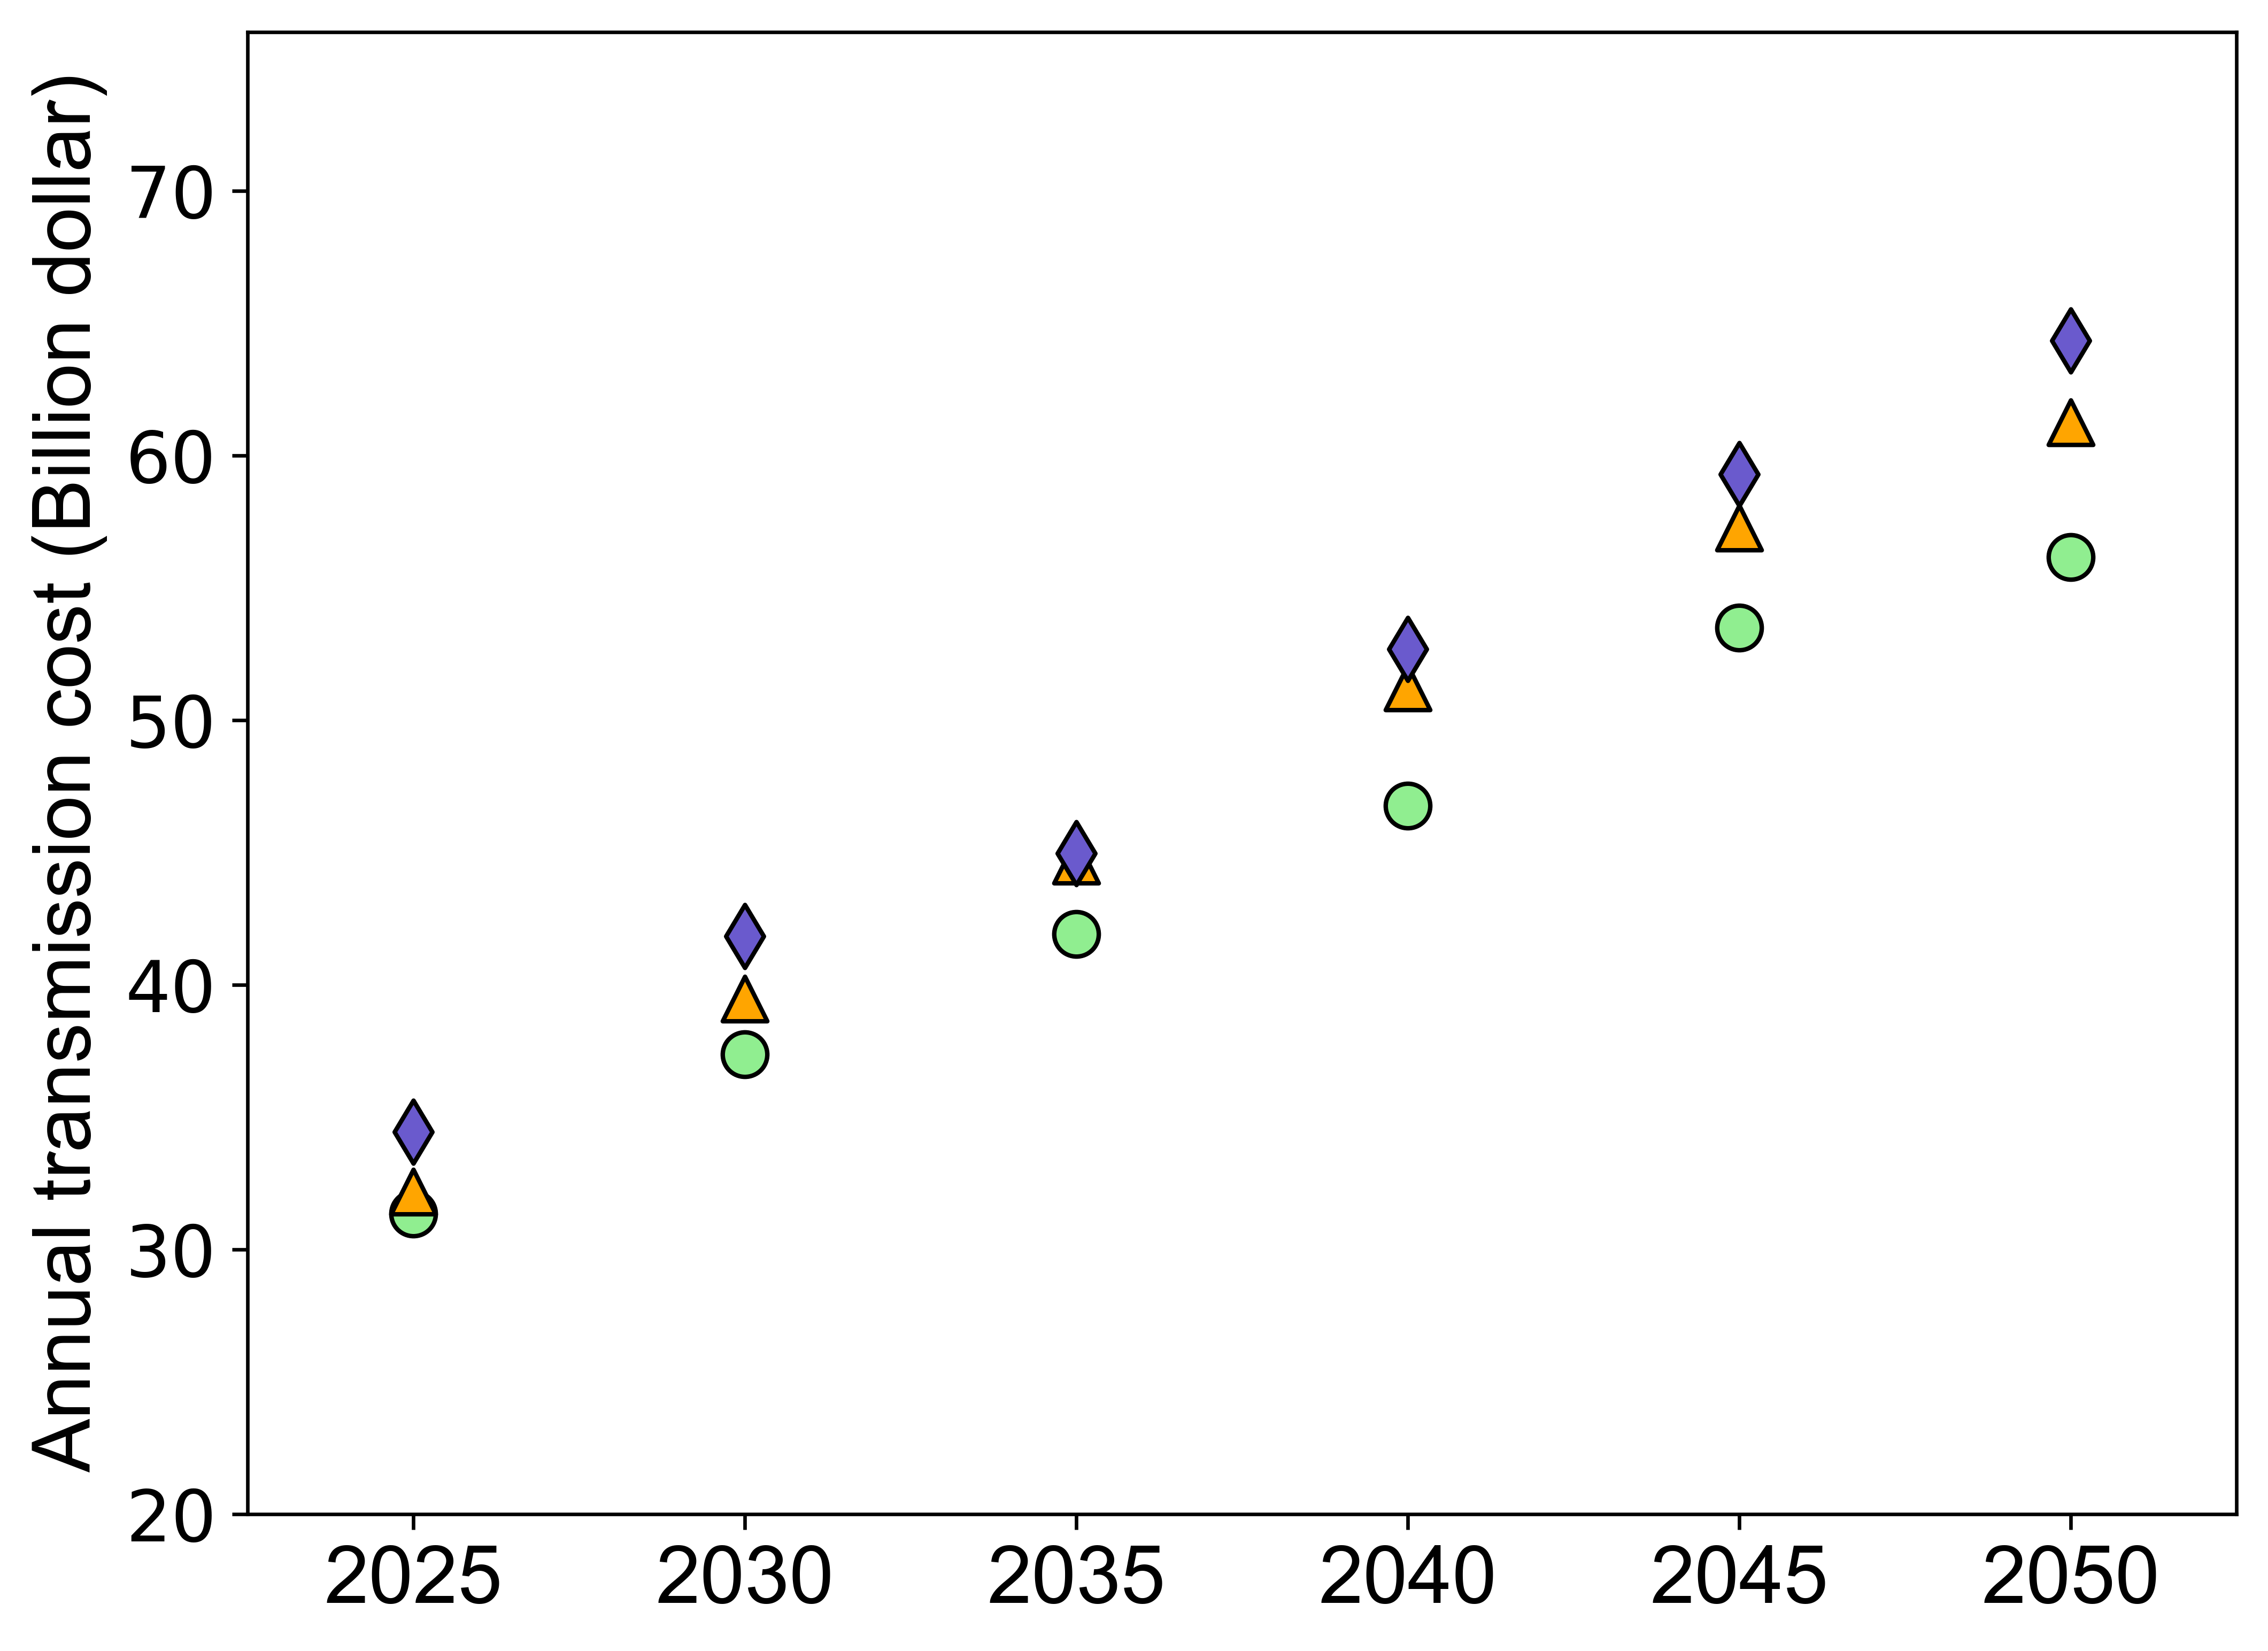

In [43]:
fig = plt.figure(figsize=(8, 6), dpi=600)
r = range (6)
year = [2025,2030,2035,2040,2045,2050]
x= range (6)
y2 = filled_trans['Ind']/1000
y1 = filled_trans['RE']/1000
y3 = filled_trans['Demand']/1000

## Plot annual transmission cost
plt.scatter (x,y1, label = 'RE-connected batteries',  marker='o', s = 100, color='lightgreen',edgecolor='black')
plt.xticks(r, year, fontname = 'Arial', size =18)
plt.xlim(-0.5, 5.5)
plt.ylim(20, 76)
plt.yticks(fontsize=16,color = 'black')
plt.ylabel('Annual transmission cost (Billion dollar)', size = 18, fontname = 'Arial') 
plt.scatter (x,y2, label = 'Grid-connected batteries', marker='^', s = 100, color='orange',edgecolor='black')
plt.scatter (x,y3, label = 'Demand-side batteries', marker='d', s = 100, color='slateblue',edgecolor='black')
plt.legend(frameon=False, bbox_to_anchor=(1, -0.5), ncol=3, fontsize = 18)
plt.savefig(f"/Users/liqunp/Desktop/Trans_cost_slow_SA5.png", bbox_inches='tight')




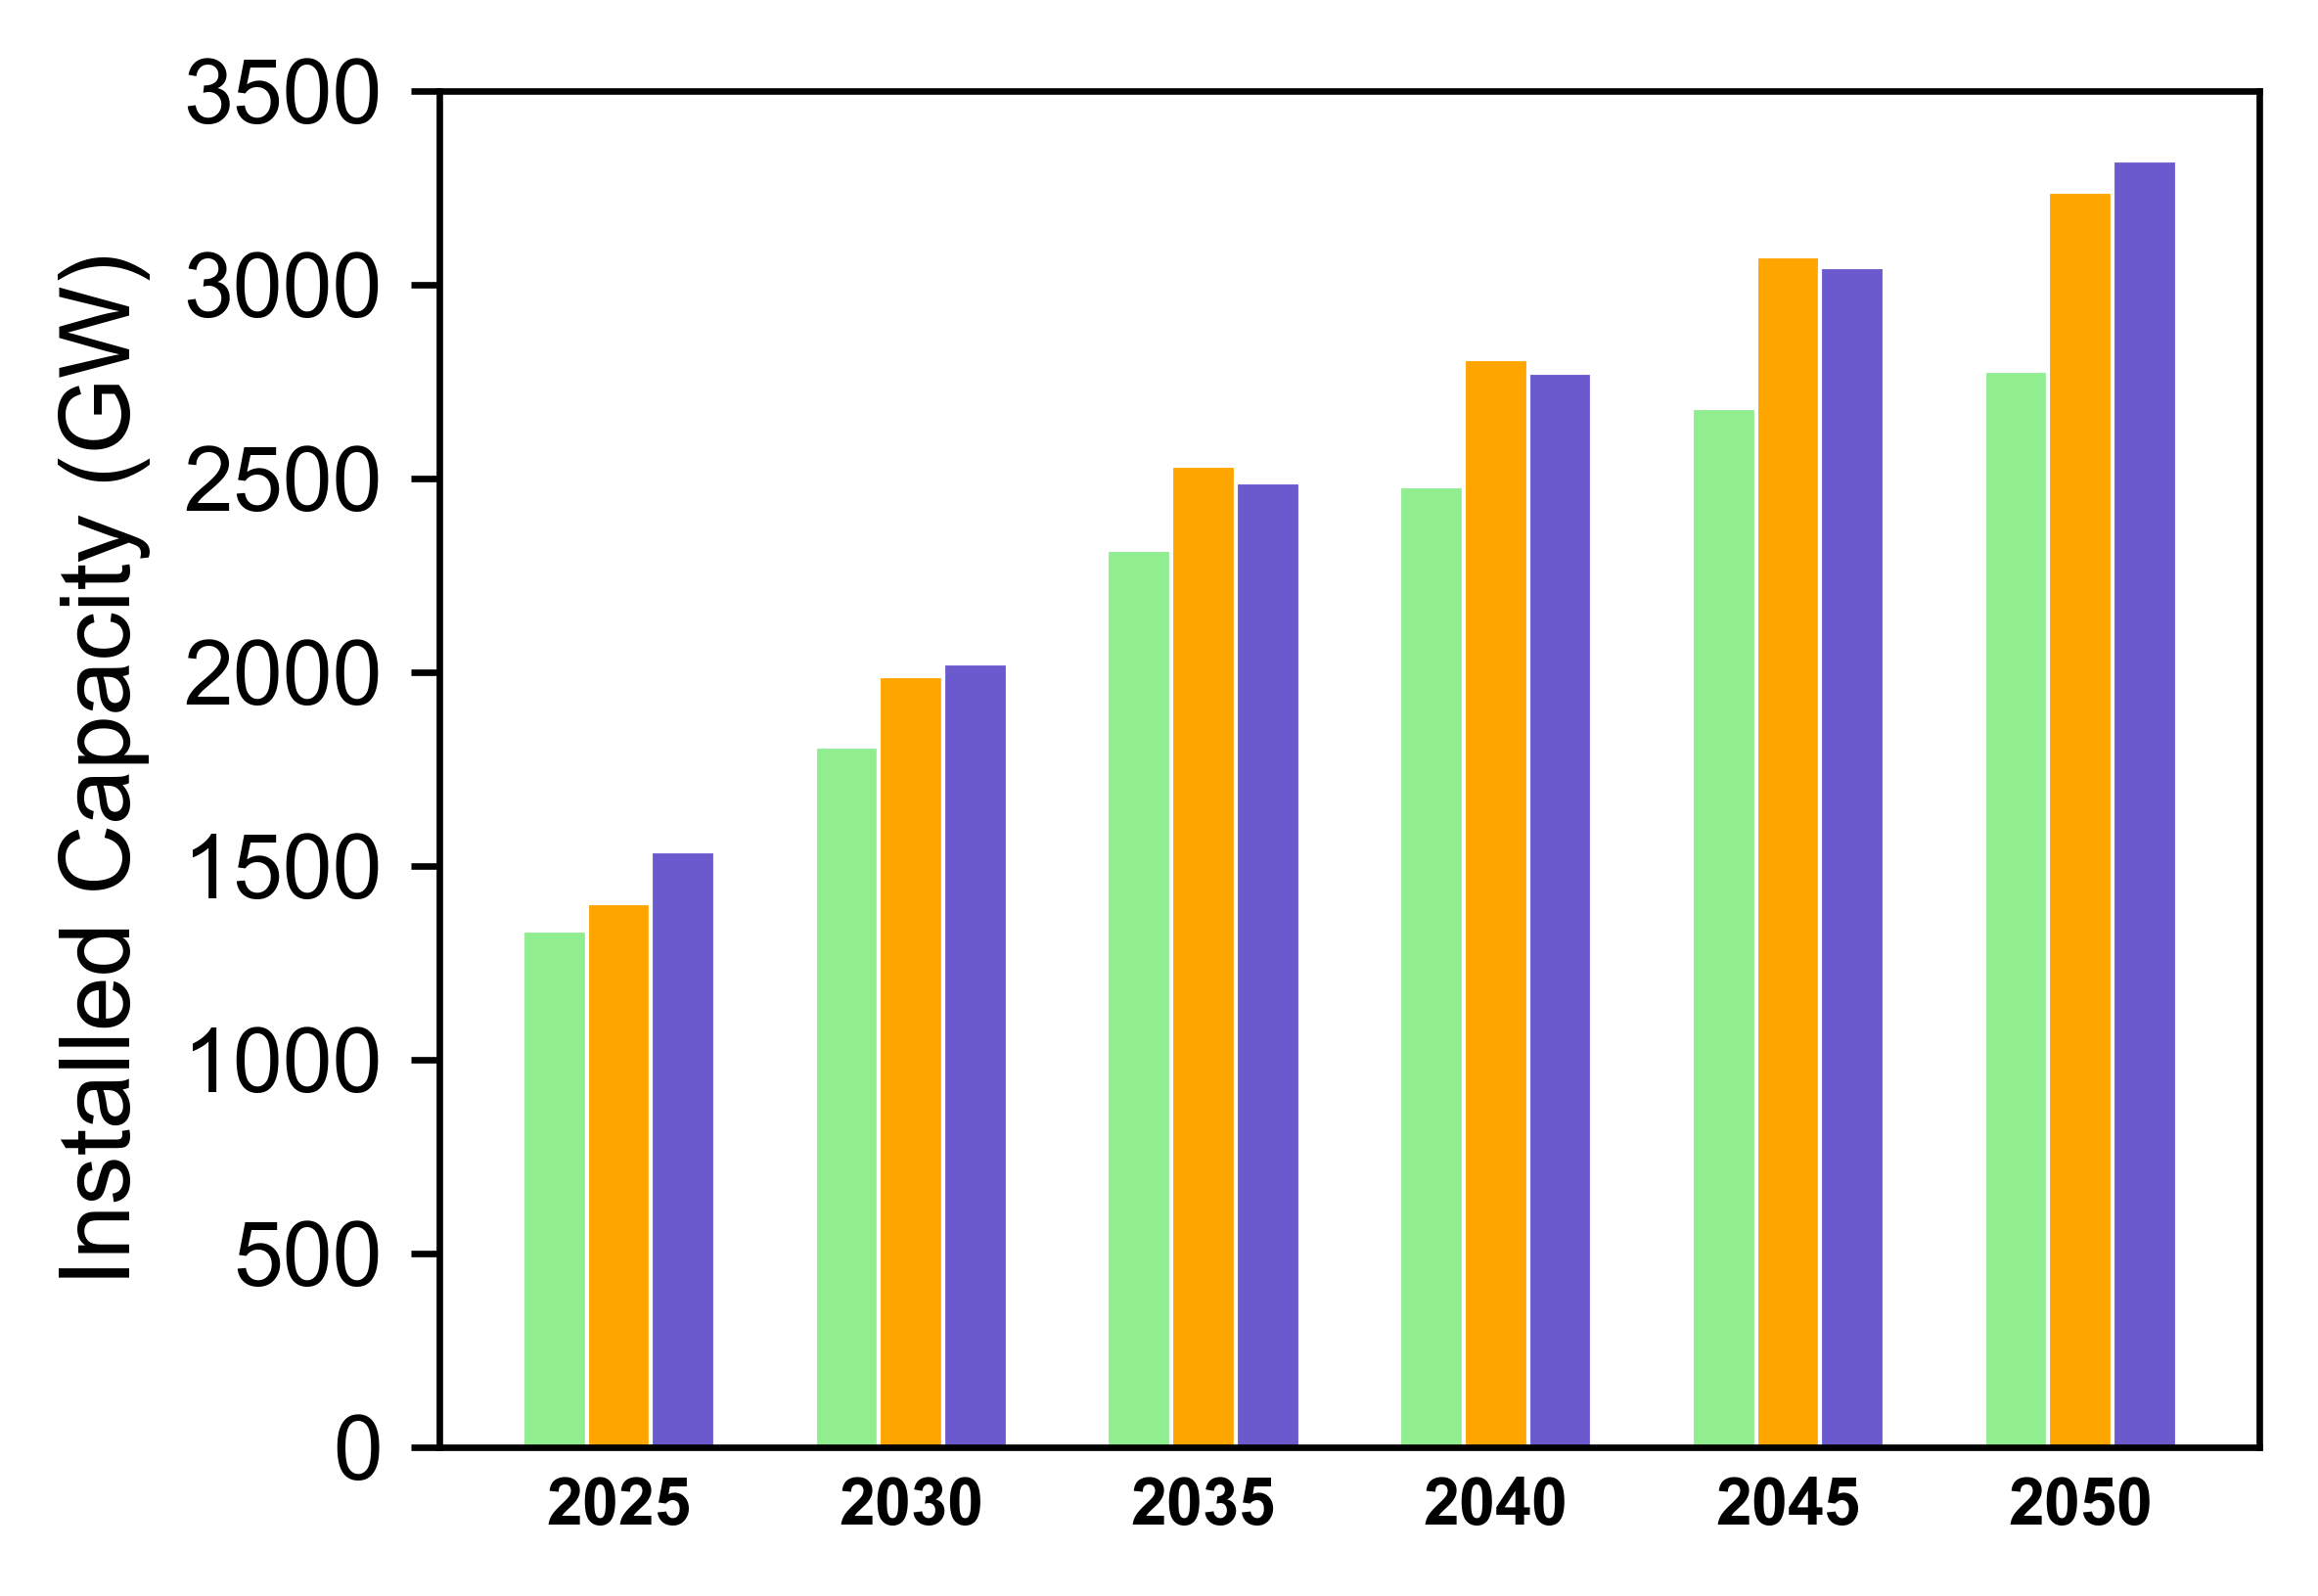

In [127]:
barWidth = 0.22
p_x = []
p_x.append(np.arange(6))
palette = [
    'lightgreen',
    'orange',
    'slateblue',]

for i in range(1, 3):
    p_x.append([x+barWidth for x in p_x[i-1]])

    
## Plot installed capacity
fig, ax = plt.subplots(figsize=(4, 3), dpi=600)
for i, scenario in enumerate(['RE', 'Ind','Demand']):
    current_bars = filled_trans_capacity[scenario]
    plt.bar(
        p_x[i], 
        current_bars, 
        width=barWidth,
        color=palette[i], 
        edgecolor='white',
        linewidth=0.5,
    )


x_labels = ['2025','2030','2035','2040','2045','2050']
for i in range(6):
    ax.text(
        i + 1* barWidth, 
        -200, 
        x_labels[i],
        ha='center',
        font='Arial',
        fontweight='bold',
        size =8,
    )
    
plt.tick_params(
    axis='x',
    bottom=False,
    labelbottom=False,
)
plt.yticks (fontname = 'Arial', size =11)
    
plt.ylim(0, 3500)
plt.ylabel('Installed Capacity (GW)', size = 12, fontname = 'Arial') 
plt.legend(frameon=False, bbox_to_anchor=(1, 0.5), ncol=3, fontsize = 18)


###### 